### Importação das bibliotecas necessárias


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns



### Leitura dos arquivos

In [2]:
hits = pd.read_csv('hits.csv')
musics = pd.read_csv('music_data.csv')
genre = pd.read_csv('genre.csv')


O significado de cada coluna de cada arquivo está na descrição da prova> Indented block


In [3]:
hits.columns 

Index(['user_id', 'music_id', 'genre_id', 'state_id', 'value'], dtype='object')

In [4]:
musics.columns

Index(['music_id', 'id_artist', 'duration', 'plays', 'downloads'], dtype='object')

In [5]:
genre.columns

Index(['genre_id', 'genre'], dtype='object')

In [6]:
hits.head(5)

,user_id,music_id,genre_id,state_id,value
0,0,105301,138,17,69.0
1,0,159953,138,17,38.0
2,0,400886,138,17,55.0
3,0,591913,138,17,101.0
4,0,617394,25,17,51.0


Merge dos dados de músicas ouvidas com os dados de gênero, assim o dataframe `df` passa a ter a informação do gênero da música

In [7]:
df = hits.merge(genre, on='genre_id')

In [8]:
df.head()

,user_id,music_id,genre_id,state_id,value,genre
0,0,105301,138,17,69.0,gospel
1,0,159953,138,17,38.0,gospel
2,0,400886,138,17,55.0,gospel
3,0,591913,138,17,101.0,gospel
4,0,1210022,138,17,51.0,gospel


Agrupamento a partir do genero, contantdo o numero de vezes que aquele genero foi escutado

In [9]:
df.groupby(by="genre")["user_id"].count().sort_values(ascending=False)

genre
forro                      274966
sertanejo                  221362
hip-hop-rap                 89071
funk                        82820
brega-funk                  52621
arrocha                     50807
gospel                      48690
brega                       36594
romantico                   31209
axe                         14977
reggae                      12200
pagode                       8595
samba                        6713
pop                          6163
regional                     6018
catolica                     4266
eletronica                   4036
mpb                          3476
bregadeira                   3461
rock                         3344
jingles-spots                3085
swingueira                   1821
pop-rock                     1612
indie                        1320
reggaeton                     865
country                       814
world-music                   733
tecnobrega                    603
house                         597
infantil

Agrupamento por usuários, somando o total de segundos esctudado por aquele usuário

In [10]:
df.groupby(by="user_id")["value"].sum().sort_values(ascending=False)

user_id
7590     14237.0
3312     14234.0
15735    14234.0
8589     14232.0
5506     14232.0
16387    14231.0
9778     14230.0
3796     14230.0
10275    14222.0
11088    14216.0
9592     14213.0
8856     14211.0
1456     14210.0
4486     14209.0
2124     14207.0
6363     14206.0
14424    14201.0
5798     14199.0
8339     14198.0
10669    14198.0
8588     14194.0
13743    14193.0
7305     14193.0
7042     14190.0
16318    14189.0
11368    14187.0
12887    14186.0
443      14185.0
4817     14185.0
2142     14185.0
          ...   
5945       776.0
9989       734.0
12798      733.0
4409       716.0
13677      662.0
5372       600.0
2166       591.0
3585       552.0
9083       491.0
995        442.0
9745       435.0
4286       385.0
2279       368.0
4916       310.0
13579      301.0
176        283.0
9639       250.0
13223      239.0
478        221.0
5026       213.0
15021      202.0
2674       129.0
7471       113.0
9180       103.0
9589        89.0
12928       83.0
6570        62.0
5965  

Media de tempo ouvida pelos usuários em horas

In [11]:
df.groupby(by="user_id")["value"].sum().mean()/3600

3.334468948314442

Grafico simples que mostra a quantas vezes aquele genero foi escutado pelos usuarios 

<Figure size 3240x2160 with 0 Axes>

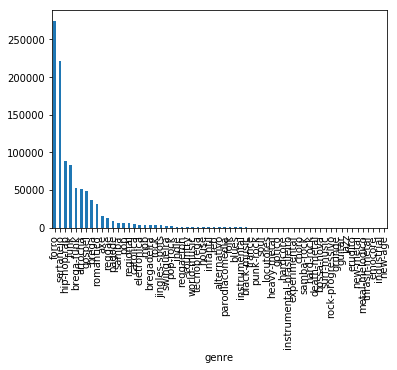

In [12]:
figure( figsize=(18, 12), dpi=180, facecolor='w', edgecolor='k')

plt.figure()
df.groupby(by="genre")["user_id"].count().sort_values(ascending=False).plot(kind='bar')
plt.show()

tempo que usuario menos ouviu no dataset

In [13]:
df.groupby(by="user_id")["value"].sum().sort_values(ascending=False).min()

35.0

tempo do usuario que mais ouviu 

In [14]:
df.groupby(by="user_id")["value"].sum().sort_values(ascending=False).max()

14237.0